# Analysing Bike Sharing Demand

Bike sharing systems are new generation of traditional bike rentals where whole process from membership,
rental, and return has become automatic. Through these systems, user can easily rent a bike from a particular
location and return at another location.
- Today, there exists a great interest in bike sharing systems due to their important role in traffic, environmental,and health issues.
- Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.
- Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems.
- This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Problem Statement 
Over the years, a steady rise in bike rentals have been observed and bike-sharing program manager need to keep up with growing demand to efficiently cover area and introduce new station if necessary.Use provided dataset to help program manager to opptimize its efficiency to join more people to green transportation solution. 


# Dataset

The dataset contains hourly and daily records of bike sharing counts. Bike-sharing rental process is highly correlated with the environmental and seasonal settings. So, weather information is also recorded in the dataset.

In [1]:
import pandas as pd    # panda dataframe 
import seaborn as sns  # ploting package
%matplotlib inline      
from scipy.stats import f_oneway   #ANOVA analysis 
from scipy.stats import shapiro  # Normality test
import matplotlib.pyplot as plt
from scipy import stats   # Correlation analysis
import statsmodels.api as sm   # Modeling 
import statsmodels.formula.api as smf  # Modeling
import numpy as np

To explore the data, we first need to read the dataset and check each features properties:

In [2]:
df=pd.read_csv('bike_sharing.csv')

In [3]:
df.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


In [5]:
df.season

0        fall
1        fall
2        fall
3        fall
4        fall
         ... 
17461    fall
17462    fall
17463    fall
17464    fall
17465    fall
Name: season, Length: 17466, dtype: object

In [6]:
df.season.value_counts()

spring    4407
summer    4376
fall      4365
winter    4318
Name: season, dtype: int64

In [7]:
df.weather.value_counts()

2    9209
1    6306
3    1529
4     422
Name: weather, dtype: int64

In [8]:
df.weekend.value_counts()

0    12440
1     5026
Name: weekend, dtype: int64

## 1. Does seasonliaty affect the total number of rentals?

In [9]:
wint =df.loc[df['season'] == 'winter', 'rental'].sum()
summ = df.loc[df['season'] == 'summer', 'rental'].sum()
fall = df.loc[df['season'] == 'fall', 'rental'].sum()
spring = df.loc[df['season'] == 'spring', 'rental'].sum()

In [10]:
df2 = pd.DataFrame({'season': ['spring', 'summer', 'fall', 'winter'],
                   'total': [spring, summ, fall, wint],
                   'code': [1, 2, 3, 4]})

<AxesSubplot:xlabel='season'>

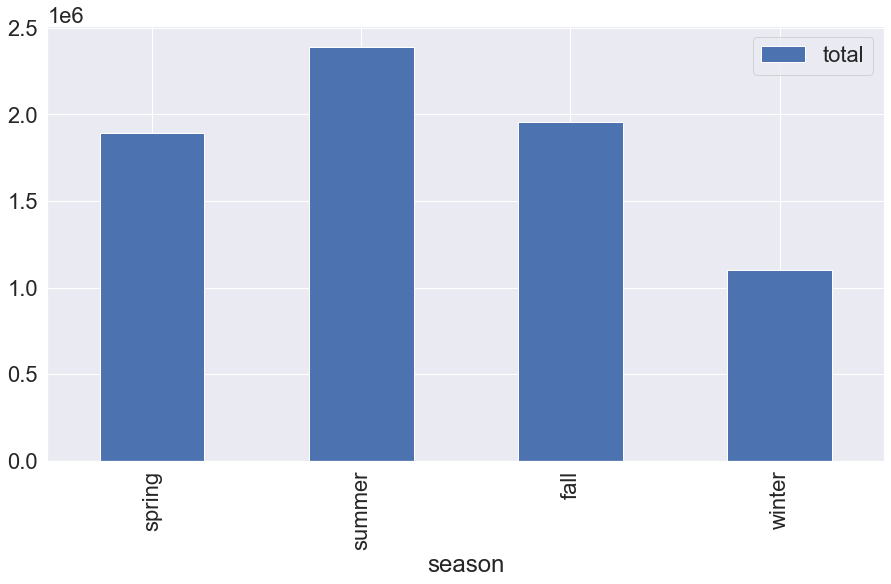

In [30]:
df2.plot.bar(x = 'season', y = 'total', figsize = (15,8))

**Summer has the most total number of rentals followed by fall, spring and winter. It seems that seasonality has an effect on the total number of rentals**

 ## 2. Is there significant realationship between seasonality effect and the total number of hourly bike rentals at level of 95% confidence?

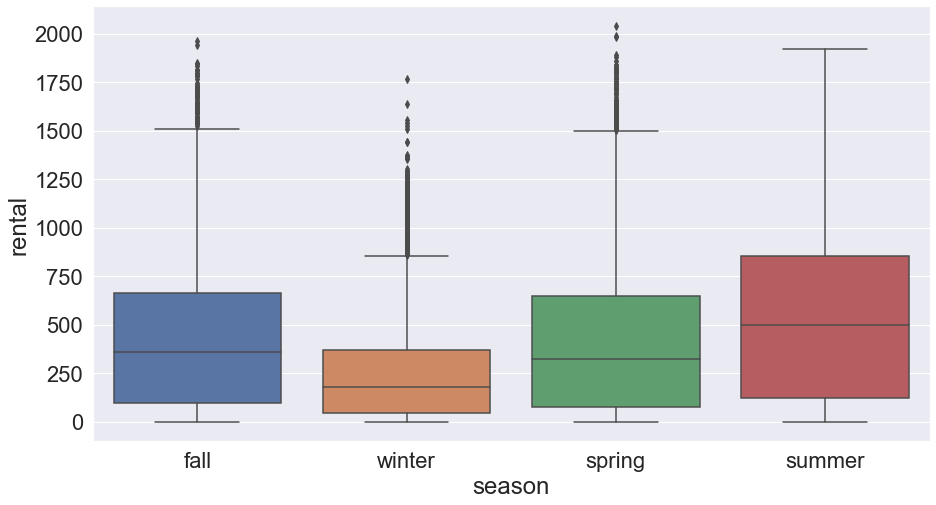

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)

sns.boxplot(x="season",
                y="rental",
                data=df)
plt.show()

In [13]:
# one-way ANOVA
#!pip install pingouin
import pingouin as pg

In [14]:
aov = pg.anova(dv = 'rental', between = 'season', data = df, detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,season,1.920196e+08,3,6.400652e+07,423.838392,8.372750e-266,0.067874
1,Within,2.637047e+09,17462,1.510163e+05,NaN,NaN,NaN


**There is a statistically significant relationship between the seasonality effect and the total number of hourly rentals to a 95% confidence level**

## 3. Does the total number of bike rentals follows Normal distribution for different season at 95% confidence level?

In [15]:
statistic,p_value=shapiro(df2['total'])

print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))
if (p_value<.05):
    print('Test demonstrates that total number of bike rental does not follows normal distribution, with a p-value of {}'.format(p_value))
else:
    print('Test demonstrates that total number of bike rental follows normal distribution, with a p-value of {}'.format(p_value ))

Statistics = 0.929, P-value=0.588
Test demonstrates that total number of bike rental follows normal distribution, with a p-value of 0.5880886316299438


## 4. How do temperature values change over the seasons?


C:\Users\xomai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperature distribution')

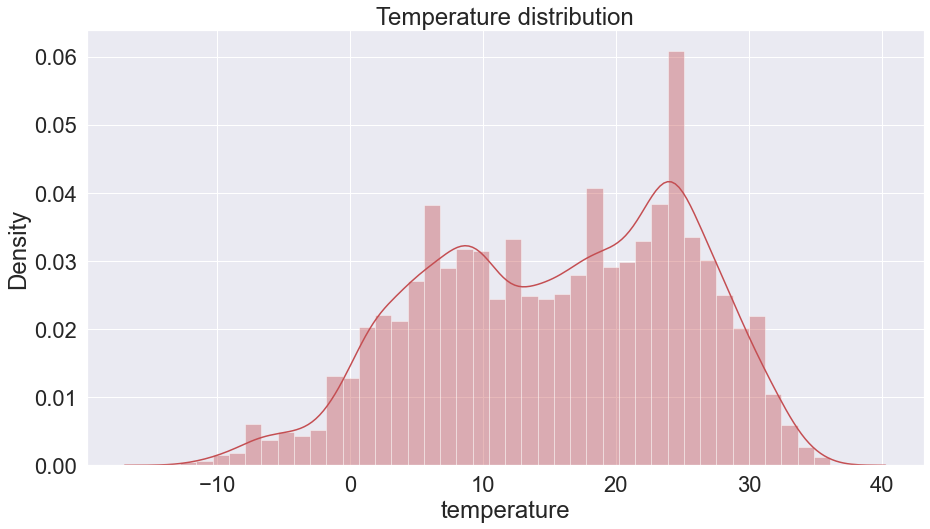

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)

g= sns.distplot(df["temperature"],   color="r")
g.set_title("Temperature distribution")

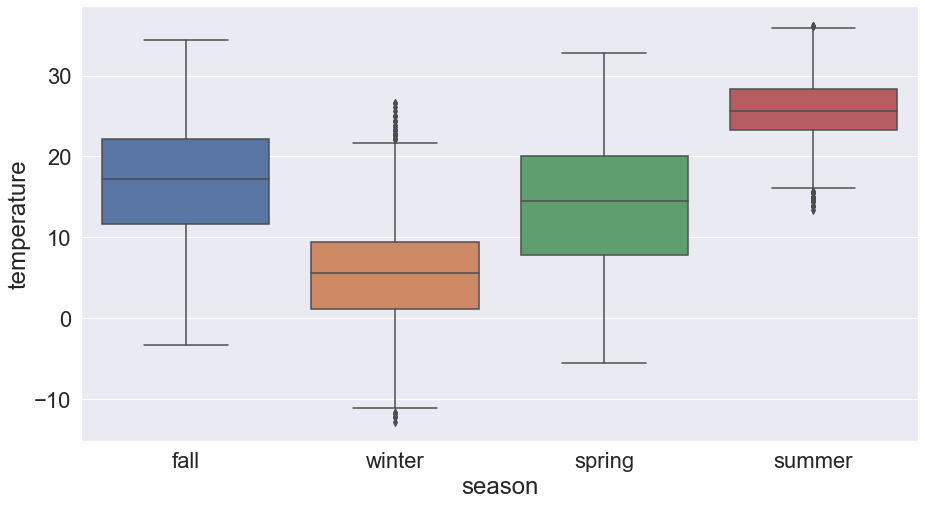

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)

sns.boxplot(x="season",
                y="temperature",
                data=df)
plt.show()

**Summer has the highest median temperature of about 26 degree Celsius followed by fall, spring, and winter. There are many outliers in the winter season on both extremes**

## 5. Is the correlation between temperature and the number of bike rentals significant at the level of 95%? 

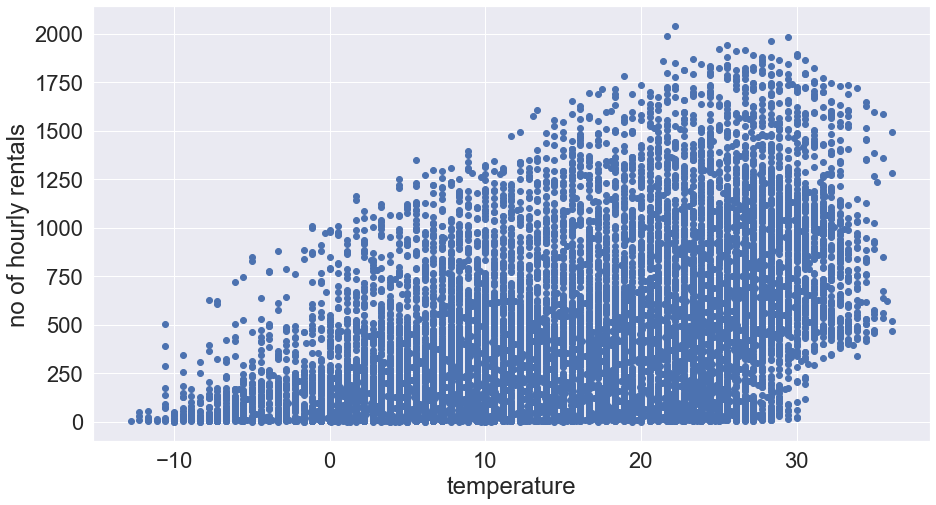

In [18]:
ax=plt.axes()

plt.scatter(df['temperature'],df['rental'])
plt.title('')
plt.xlabel('temperature')
plt.ylabel('no of hourly rentals')
plt.show()

In [19]:
statistic,p_value=stats.pearsonr(df['temperature'], df['rental'])
print(statistic,p_value)

if (p_value<.05):
    print('Pearson Correlation Test demonstrates that temperature and number of bike rentals are significantly linearly correlated, with a p-value of %.3f'%p_value )
else:
    print('Pearson Correlation Test demonstrates that temperature and number of bike rentals are linearly independent, with a p-value of %.3f'%p_value)

0.4363755661133611 0.0
Pearson Correlation Test demonstrates that temperature and number of bike rentals are significantly linearly correlated, with a p-value of 0.000


## 6. Is there a significant difference between the total bike rental on weekends and on working days?


In [20]:
df_weekend=df[df['weekend']==1]
df_weekday=df[df['weekend']==0]

from scipy.stats import f_oneway   #ANOVA analysis 

# one-way ANOVA
statistics,p_value = f_oneway(df_weekend['rental'],df_weekday['rental'])

print("\n \n Statistics = %.3f , p_value=%.3f" %(statistics,p_value))
if (p_value<.05):
    print('Analysis of the variance model demonstrates that there is a significant difference in the total bike rentals between a weekend and a weekday, with a p-value of %.3f'%p_value )
else:
    print('Analysis of the variance model demonstrates that there is no differece in total bike rental whether it is a weekend or a weekday, with a p-value of %.3f'%p_value)


 
 Statistics = 33.236 , p_value=0.000
Analysis of the variance model demonstrates that there is a significant difference in the total bike rentals between a weekend and a weekday, with a p-value of 0.000


In [21]:
aov = pg.anova(dv = 'rental', between = 'weekend', data = df, detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,weekend,5.373787e+06,1,5.373787e+06,33.235843,8.300923e-09,0.001899
1,Within,2.823693e+09,17464,1.616865e+05,NaN,NaN,NaN


## 7. To what extend hourly demand will be affected by temperature changes? What is the main driver of  number of bike rentals?

In [22]:

formula = 'rental ~ temperature'
model = smf.glm(formula = formula, data=df, family=sm.families.Poisson())
result_GLM = model.fit()
print(result_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17464
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7282e+06
Date:                Sun, 25 Sep 2022   Deviance:                   5.3324e+06
Time:                        20:21:20   Pearson chi2:                 5.34e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2190      0.001   5809.286      

In [29]:
formula = 'rental ~ temperature + season + weekend'
model = smf.glm(formula = formula, data=df, family=sm.families.Poisson())
result_GLM = model.fit()
print(result_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rental   No. Observations:                17466
Model:                            GLM   Df Residuals:                    17460
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.6639e+06
Date:                Sun, 25 Sep 2022   Deviance:                   5.2038e+06
Time:                        20:52:05   Pearson chi2:                 5.23e+06
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.0380      0.001  

## 8. What is your suggestions and recommendations to enhance the effectiveness of bike rental business ?

**Based on the analysis temperature is a great indicator for the number of hourly rental so the bike rental manager should have the stations stocked in the months of Summer and Fall because these months have the highest number of rentals.**

**Additionally weekends are alot busier than weekdays so this is another time the manager should have the stands stocked**

**We can also see from our scatterplot that most rentals happen between the 25 degree to 30 degree mark so seasons such as spring fall and summer when the temperature could lie between those two temperatures are seasons where the manager could consider having new stations.** 